## Comparing drag models already implemented into UCL ODL 

In [2]:
#Import relevant modules
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Import TLE data for full path, Nsight 12/06/2018 - 14/06/2018
measured_data = np.loadtxt("TLE 120618 - 140618.txt", dtype = str, usecols = (7))
remove_indices = np.arange(0,24,2) #Array slicing stuff to get desired data
measured_mean_motion = np.delete(measured_data, remove_indices)

In [4]:
print(measured_data)
print(measured_mean_motion)

['0' '15.61458543' '0' '15.61465011' '0' '15.61465895059686' '0'
 '15.61468528' '0' '15.61469025059736' '0' '15.61470506' '0' '15.61475155'
 '0' '15.61476448059836' '0' '15.61479471' '0' '15.61487332059993' '0'
 '15.61489038' '0' '15.61489673']
['15.61458543' '15.61465011' '15.61465895059686' '15.61468528'
 '15.61469025059736' '15.61470506' '15.61475155' '15.61476448059836'
 '15.61479471' '15.61487332059993' '15.61489038' '15.61489673']


In [5]:
#Convert mean motion to SMA
#First turn mean motion into time period
measured_mean_motion = measured_mean_motion.astype(float)
T_measured_days = 1/measured_mean_motion
#Convert time period to seconds
T_measured_s = T_measured_days * 24 * 60 * 60
#Convert to semi major axis using keppler law thing
G = 6.67430*10**-11
M = 5.9722*10**24
const = G*M/(4*((np.pi)**2))
SMA_measured = ((T_measured_s**2)*const)**(1/3)
#Convert to kms
SMA_measured = SMA_measured/1000
print(SMA_measured)

[6761.59207375 6761.57340154 6761.57084939 6761.5632485  6761.56181357
 6761.55753834 6761.54411749 6761.54038466 6761.531658   6761.50896475
 6761.50404007 6761.50220697]


In [6]:
#Measured time
T_measured = np.loadtxt("TLE 120618 - 140618.txt", dtype = float, usecols = 3)
T_measured = np.delete(T_measured, remove_indices+1)
print(T_measured)
#Need time in seconds, with first time defined as 0
T_measured = T_measured - T_measured[0]
print(T_measured)
#Convert to hours
T_measured = T_measured*24
print(T_measured)

[18163.00171702 18163.51371525 18163.57771492 18163.83371337
 18163.89771298 18164.02571204 18164.47370754 18164.5377067
 18164.85770257 18165.56169096 18165.7536872  18165.81768585]
[0.         0.51199823 0.5759979  0.83199635 0.89599596 1.02399502
 1.47199052 1.53598968 1.85598555 2.55997394 2.75197018 2.81596883]
[ 0.         12.28795752 13.8239496  19.9679124  21.50390304 24.57588048
 35.32777248 36.86375232 44.5436532  61.43937456 66.04728432 67.58325192]


In [7]:
#Now need other datasets generated using ODL21lite 
def get_SMA(odl_output):
    '''Function that obtains Time and semi major axis values from odl21lite output'''
    T, SMA = np.loadtxt(odl_output, skiprows = 1, usecols = (0, 8), unpack = True, delimiter = ",")
    T = T/3600
    return T, SMA
T_no_atm, SMA_no_atm = get_SMA("NSIGHT_no_atmosphere_2.txt")
T_USSA, SMA_USSA = get_SMA("NSIGHT_USSA_2.txt")
T_TIEGCM, SMA_TIEGCM = get_SMA("NSIGHT_TIEGCM_1.txt")


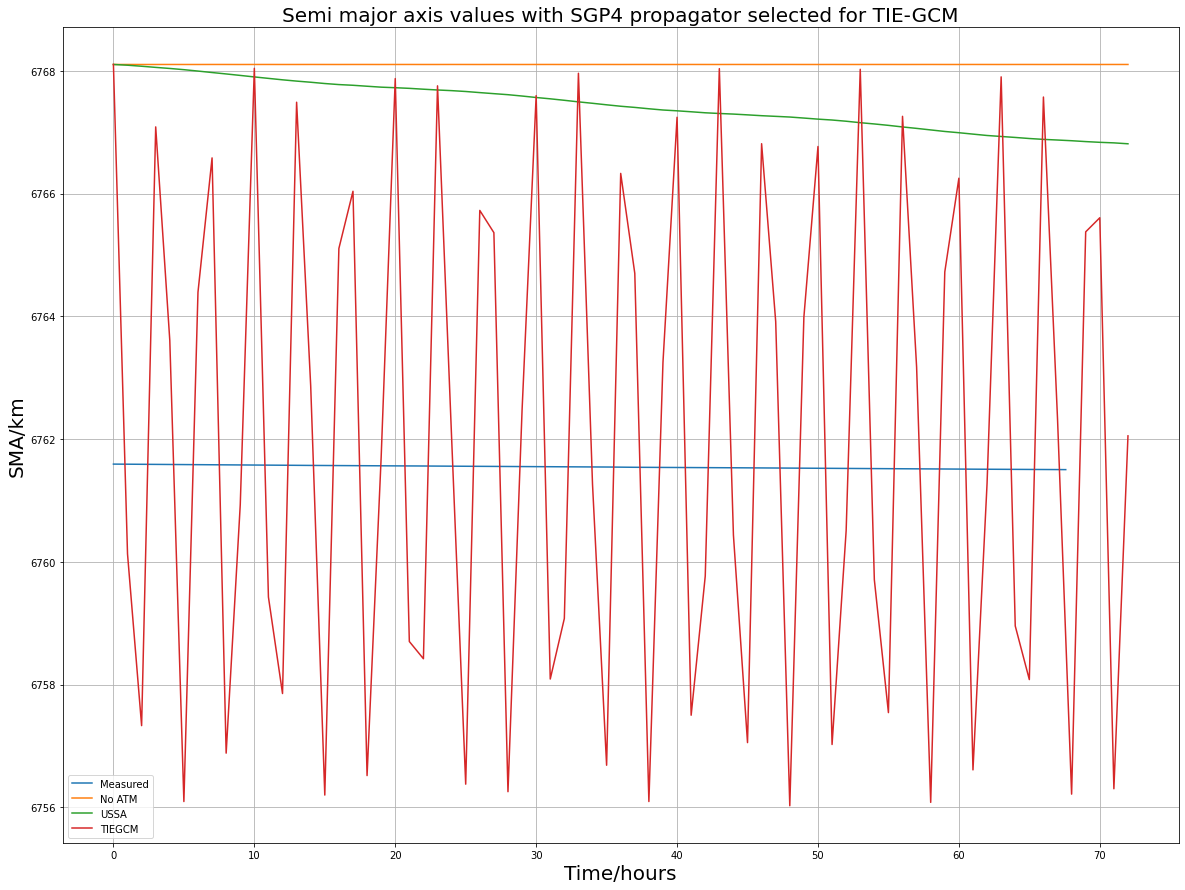

In [8]:
plt.figure(figsize = (20,15))
plt.plot(T_measured, SMA_measured, label = "Measured")
plt.plot(T_no_atm, SMA_no_atm, label = "No ATM")
plt.plot(T_USSA, SMA_USSA, label = "USSA")
plt.plot(T_TIEGCM, SMA_TIEGCM, label = "TIEGCM")
plt.legend()
plt.grid()
plt.ylabel("SMA/km", size = 20)
plt.xlabel("Time/hours", size = 20)
plt.title("Semi major axis values with SGP4 propagator selected for TIE-GCM", size = 20)
plt.savefig("TIEGCM Keplerian")


In [9]:
T_no_atm, SMA_no_atm = get_SMA("NSIGHT_NoATM_Corrected.txt")
T_USSA, SMA_USSA = get_SMA("NSIGHT_USSA76_Corrected.txt")
T_TIEGCM, SMA_TIEGCM = get_SMA("NSIGHT_TIEGCM_Corrected.txt")
T_DTM, SMA_DTM = get_SMA("dtm94_corrected.txt")

[6761.59207375 6761.57340154 6761.57084939 6761.5632485  6761.56181357
 6761.55753834 6761.54411749 6761.54038466 6761.531658   6761.50896475
 6761.50404007 6761.50220697]


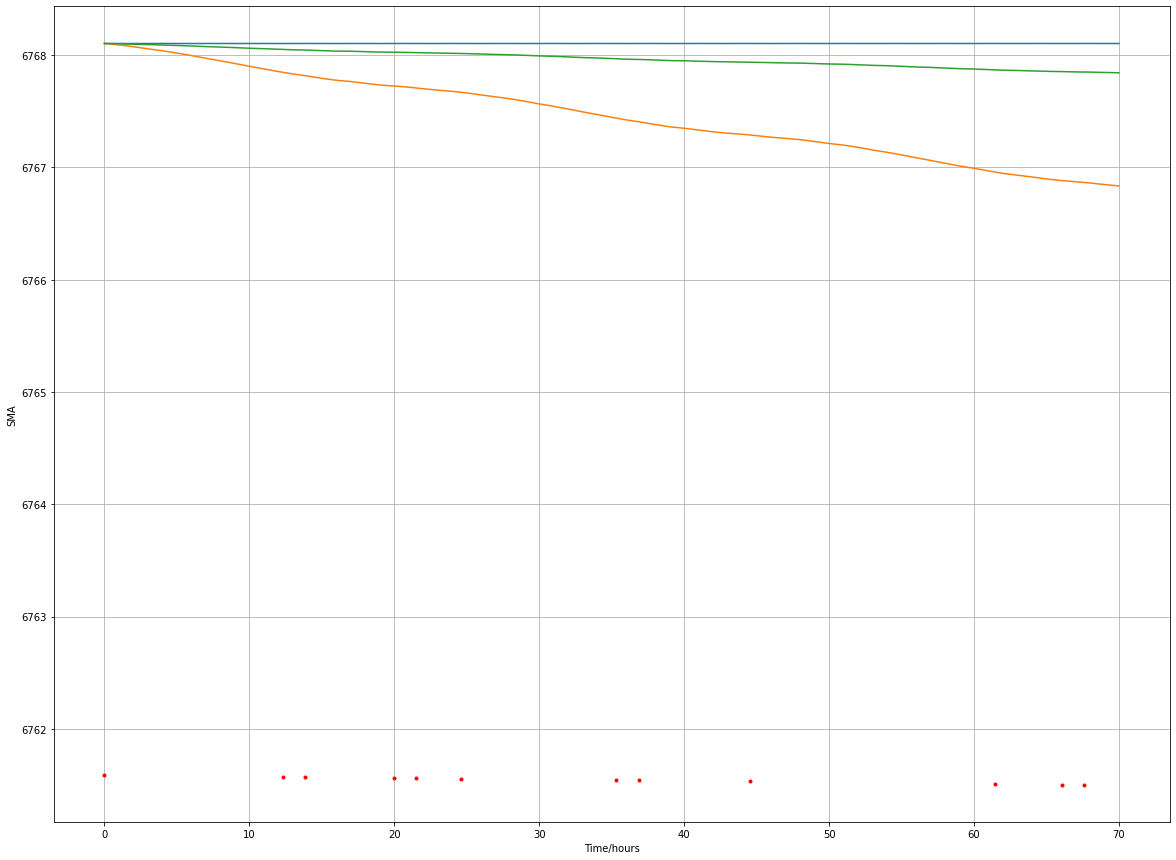

In [10]:
plt.figure(figsize = (20, 15))
plt.plot(T_measured, SMA_measured, "r.")
plt.plot(T_no_atm, SMA_no_atm, label = "No ATM")
plt.plot(T_USSA, SMA_USSA, label = "USSA")
plt.plot(T_TIEGCM, SMA_TIEGCM, label = "TIEGCM")
plt.xlabel("Time/hours")
plt.ylabel("SMA")
plt.grid()
print(SMA_measured)

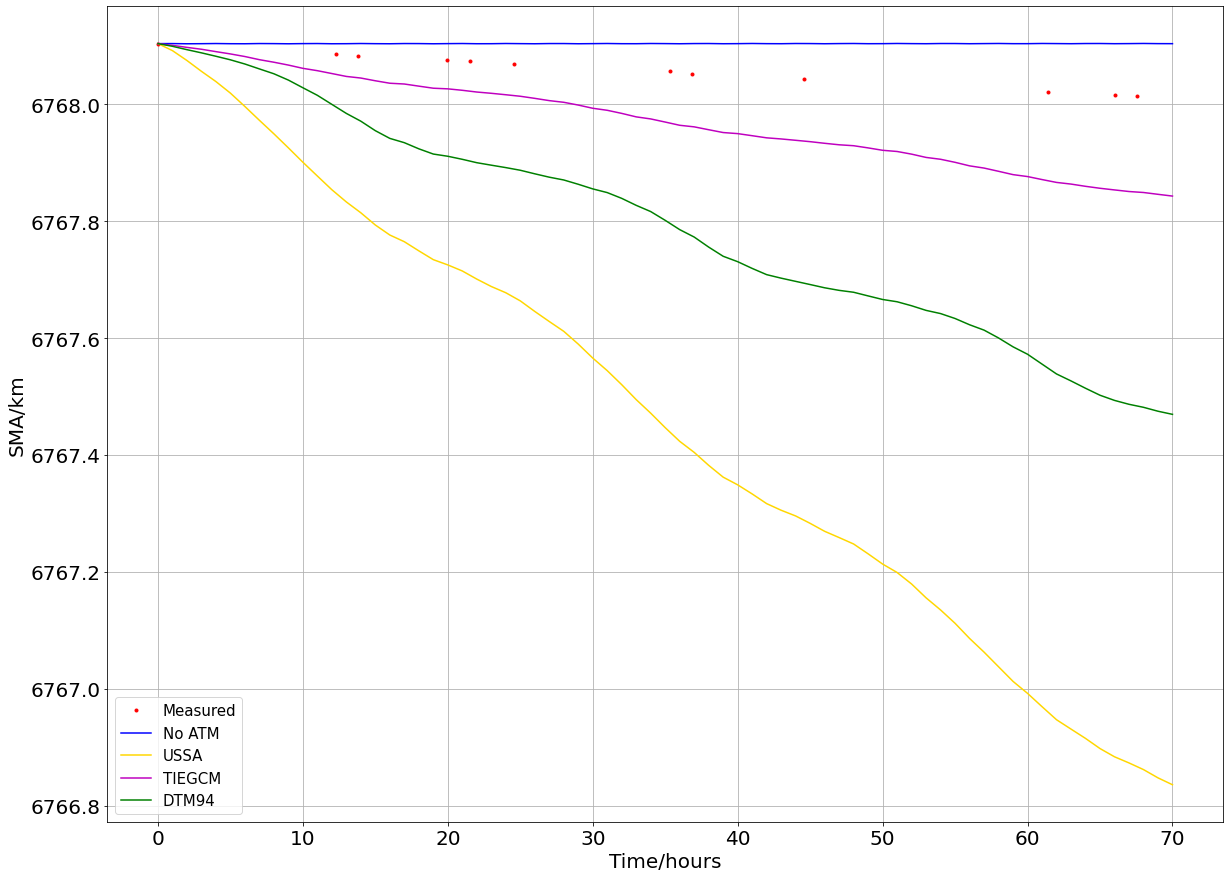

In [15]:
measured_SMA_corrected = [6768.104184820292961, 6768.085598168647881, 6768.083062999105068, 6768.075511400725423, 6768.074088248619543, 6768.069845360915162, 6768.056501175458309, 6768.052787641548338, 6768.044116674999806, 6768.021575559015532, 6768.016686622949787, 6768.014854145162722]
plt.figure(figsize = (20, 15))
plt.plot(T_measured, measured_SMA_corrected, "r.", label = "Measured")
plt.plot(T_no_atm, SMA_no_atm, label = "No ATM", c = "b")
plt.plot(T_USSA, SMA_USSA, label = "USSA", c = "gold")
plt.plot(T_TIEGCM, SMA_TIEGCM, label = "TIEGCM", c = "m")
plt.plot(T_DTM, SMA_DTM, label = "DTM94", c = "g")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel("SMA/km", size = 20)
plt.xlabel("Time/hours", size = 20)
plt.legend(fontsize = 15)
plt.grid()